<a href="https://colab.research.google.com/github/buraktanis/Heart-Failure-Dataset/blob/main/Heart_Failure_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# **Dataset Information**

In [3]:
# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **Models and Results**

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, silhouette_score

# Load the dataset

# Separate features and target
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE:", lr_mse)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
rf_reg_pred = rf_reg.predict(X_test_scaled)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
print("Random Forest Regression MSE:", rf_reg_mse)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# Logistic Regression Metrics
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression Precision:", log_reg_precision)
print("Logistic Regression Recall:", log_reg_recall)
print("Logistic Regression F1-Score:", log_reg_f1)

# Random Forest Classification
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_clf_pred = rf_clf.predict(X_test_scaled)

# Random Forest Classification Metrics
rf_clf_accuracy = accuracy_score(y_test, rf_clf_pred)
rf_clf_precision = precision_score(y_test, rf_clf_pred)
rf_clf_recall = recall_score(y_test, rf_clf_pred)
rf_clf_f1 = f1_score(y_test, rf_clf_pred)

print("Random Forest Classification Accuracy:", rf_clf_accuracy)
print("Random Forest Classification Precision:", rf_clf_precision)
print("Random Forest Classification Recall:", rf_clf_recall)
print("Random Forest Classification F1-Score:", rf_clf_f1)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# KMeans Clustering Metric
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("KMeans Clustering Silhouette Score:", silhouette_avg)

# Optionally, add the cluster labels to the dataframe and count the number of instances in each cluster
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())


Linear Regression MSE: 0.1787434117127499
Random Forest Regression MSE: 0.2020983333333333
Logistic Regression Accuracy: 0.8
Logistic Regression Precision: 0.9333333333333333
Logistic Regression Recall: 0.56
Logistic Regression F1-Score: 0.7000000000000001
Random Forest Classification Accuracy: 0.7
Random Forest Classification Precision: 0.7333333333333333
Random Forest Classification Recall: 0.44
Random Forest Classification F1-Score: 0.5499999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Clustering Silhouette Score: 0.18883554360924715
Cluster
0    192
1    107
Name: count, dtype: int64


# **Graphics of Models**

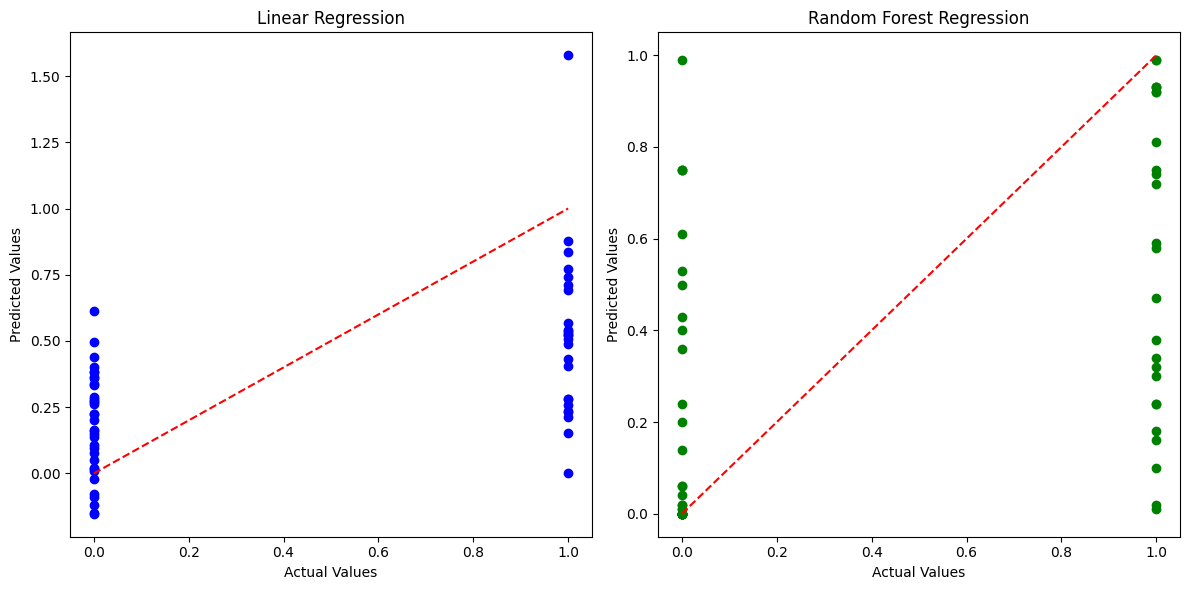

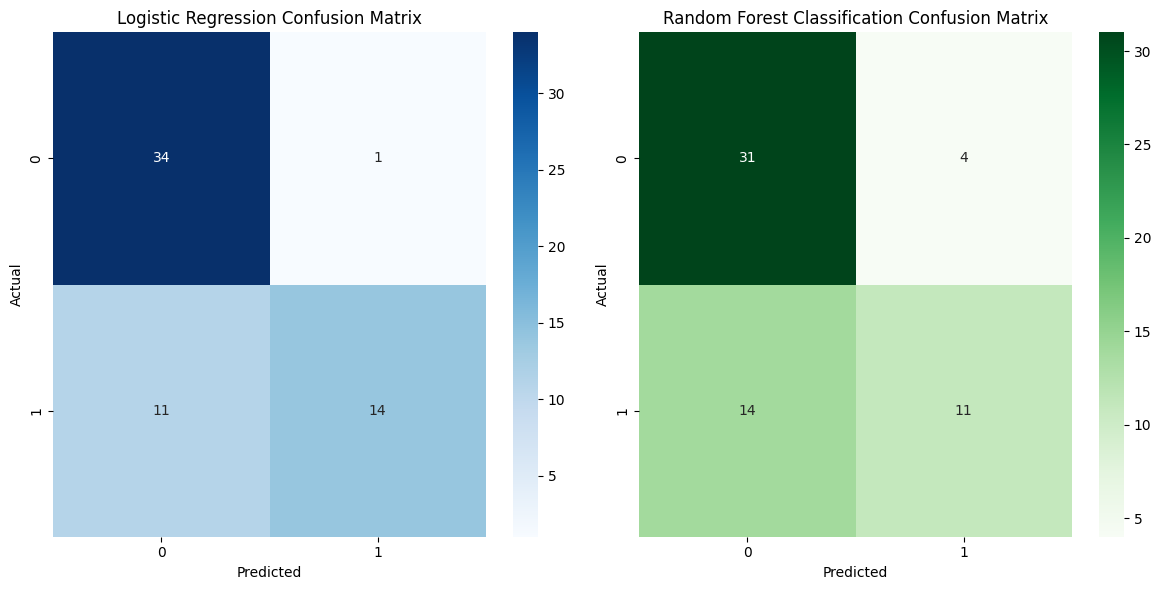

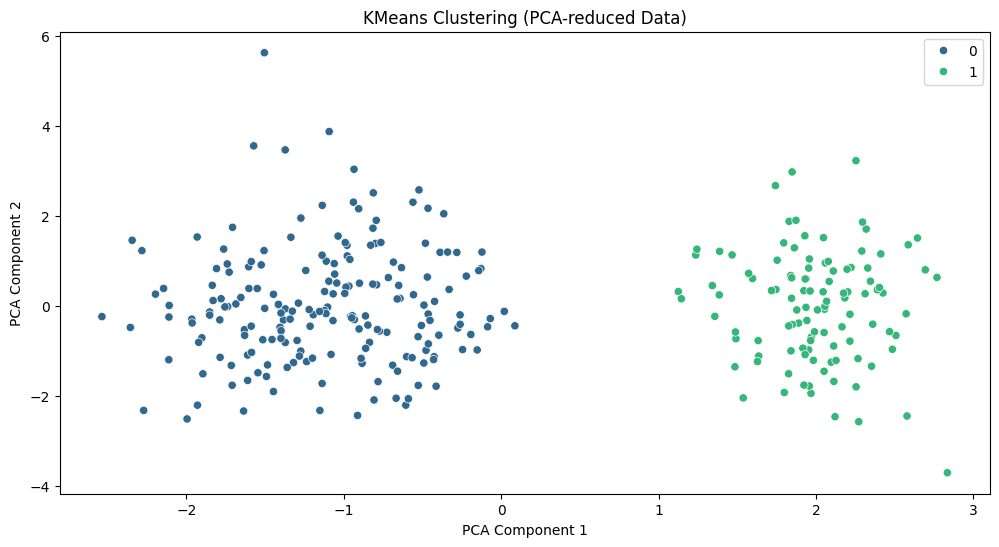

In [11]:
from sklearn.decomposition import PCA

# Regression Plots
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_reg_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Classification Plots
plt.figure(figsize=(12, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest Classification Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, rf_clf_pred), annot=True, cmap='Greens', fmt='g')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Clustering Plot
# Use PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('KMeans Clustering (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# **Visualizations**

In [7]:
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                    'platelets', 'serum_creatinine', 'serum_sodium', 'time']
numeric_summary = df[numeric_features].describe()

# Draw histograms for every feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.axvline(x=numeric_summary.loc['mean', feature], color='r', linestyle='--', label='Mean')
    plt.axvline(x=numeric_summary.loc['50%', feature], color='g', linestyle='--', label='Median')
    plt.title(f"{feature.capitalize()} Distribution")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{feature}_histogram.png")
    plt.close()

# Draw boxplots for every feature
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=feature)
    plt.title(f"{feature.capitalize()} Boxplot")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Values")
    plt.tight_layout()
    plt.savefig(f"{feature}_boxplot.png")
    plt.close()

# Draw scatterplots for every feature
scatterplots = [('age', 'ejection_fraction'), ('serum_creatinine', 'serum_sodium')]
for i, (feature1, feature2) in enumerate(scatterplots, start=1):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature1, y=feature2)
    plt.title(f"{feature1.capitalize()} vs. {feature2.capitalize()} Scatterplot")
    plt.xlabel(feature1.capitalize())
    plt.ylabel(feature2.capitalize())
    plt.tight_layout()
    plt.savefig(f"{feature1}_{feature2}_scatterplot.png")
    plt.close()

# Save all the data summary
numeric_summary.to_csv("numeric_summary.csv")

# **Numeric data for every feature**

In [15]:
df2 = pd.read_csv('numeric_summary.csv')
df2


,Unnamed: 0,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
1,mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
2,std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
3,min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
4,25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
5,50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
6,75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
7,max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


# **Correlation Matrix**

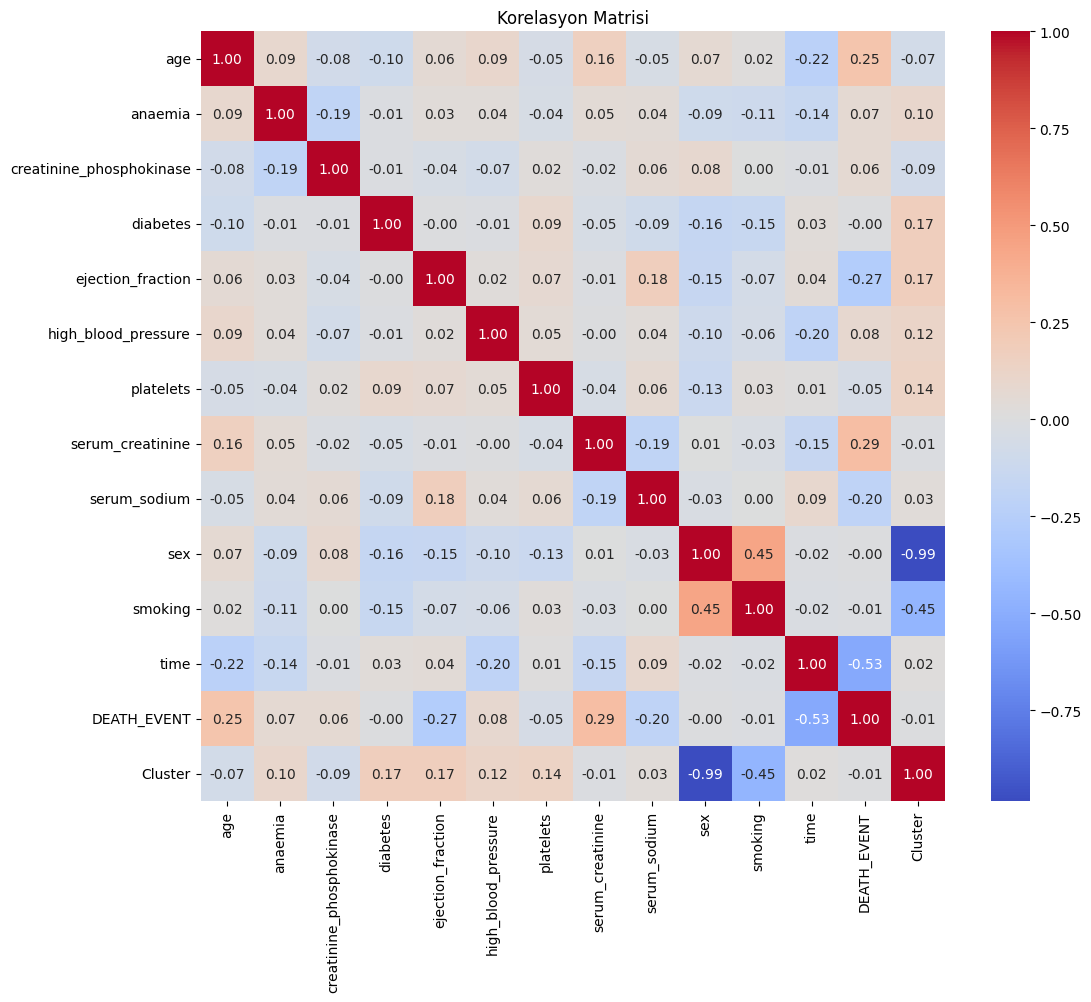

In [14]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korelasyon Matrisi')
plt.show()